In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [59]:
# 2. Upload the cleaned CSV
print("🚀 Please upload your *_cleaned.csv file:")
uploaded = files.upload()
input_filename = list(uploaded.keys())[0]
print(f"✔ Uploaded file: {input_filename}")

🚀 Please upload your *_cleaned.csv file:


Saving tampa_labeled.csv to tampa_labeled.csv
✔ Uploaded file: tampa_labeled.csv


In [60]:
# 3. Read the uploaded DataFrame
df = pd.read_csv(input_filename)
df['date'] = pd.to_datetime(df['date'])
df['clean_text'] = df['clean_text'].fillna('').astype(str)

In [63]:
df.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,latitude,longitude,review_count,stars_y,clean_text,toxicity_score,bias_similarity,is_biased
0,majL5SbnLG1r35p3Y60JIQ,PLyOKlWMEw1SJ0RhEsVtsw,i_kM6kP4u4Wxr3o3_9XN_A,5,0,0,0,One of the best sushi places I've eaten at!! I...,2022-01-19 19:45:43,Samurai Blue,...,Tampa,FL,28.070159,-82.506229,123,4.0,one of the best sushi places i ve eaten at i h...,0.003101,0.207061,False
1,cAr8oINk5s89sFWk4AyrAw,OMVp9p1SZDSjKIkG-eDO4w,4RrwqZwLnRe0Yhkv5_03fQ,1,0,0,0,So frustrated with Alamo. Tried to rent a car ...,2022-01-19 19:42:11,Alamo Rent A Car,...,Tampa,FL,27.963688,-82.534713,310,3.5,so frustrated with alamo tried to rent a car b...,0.015431,0.242051,False
2,du-KcU3422VJx6e9QlkkGA,Fa3Hq90wgZZPvgNxhVWnMw,L5LLN0RafiV1Z9cddzvuCw,5,0,0,0,Stop by for lunch & ordered the Seared Scallop...,2022-01-19 19:29:13,Ulele,...,Tampa,FL,27.960161,-82.462530,3064,4.0,stop by for lunch ordered the seared scallops ...,0.009108,0.251487,False
3,P_SNEE3GTeDjQzgecQiqhA,F2VyHSXuMIDYASmZsJf9Pg,L5LLN0RafiV1Z9cddzvuCw,5,0,0,0,Lennon was great! My boyfriend and I are visit...,2022-01-19 19:28:07,Ulele,...,Tampa,FL,27.960161,-82.462530,3064,4.0,lennon was great my boyfriend and i are visiti...,0.000911,0.192037,False
4,V-l7PE-lA3MZBqzM4SWoXQ,-dQAzxnGUlRYI4TMk7L7JQ,ZV8eIF820nOhsI-Tk0qt-g,3,0,0,0,Pretty pricey and not much food for the amount...,2022-01-19 18:55:26,Sa Ri One Grill,...,Tampa,FL,27.998265,-82.563672,231,4.0,pretty pricey and not much food for the amount...,0.011613,0.223937,False


In [64]:
# 4. Basic summary
total_reviews = len(df)
biased_reviews = df['is_biased'].sum()
print(f"Total reviews: {total_reviews}")
print(f"Biased reviews: {biased_reviews} ({biased_reviews/total_reviews:.1%})")

Total reviews: 12000
Biased reviews: 172 (1.4%)


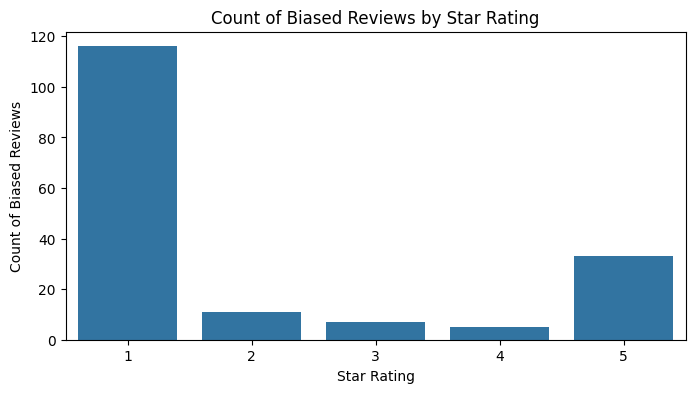

In [65]:
# Count of biased reviews per star rating
bias_counts = df.groupby('stars_x')['is_biased'].sum().reset_index(name='biased_count')

plt.figure(figsize=(8,4))
sns.barplot(data=bias_counts, x='stars_x', y='biased_count')
plt.xlabel("Star Rating")
plt.ylabel("Count of Biased Reviews")
plt.title("Count of Biased Reviews by Star Rating")
plt.show()


<ipython-input-66-39de801e907c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=star_counts_df, x='Star Rating', y='Count', palette='viridis') # Added a palette for visual flair


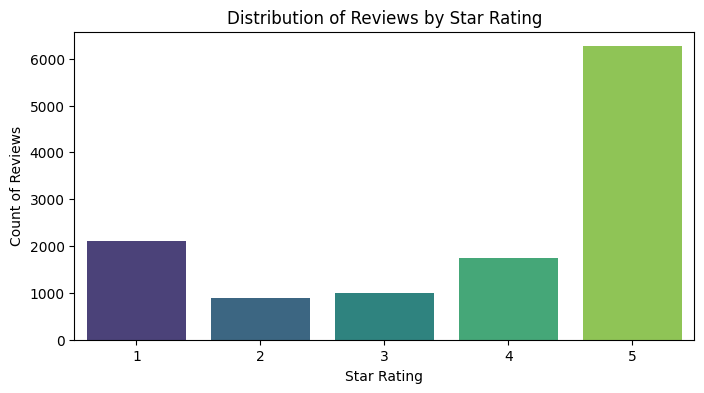

In [66]:

# 1. Count the occurrences of each unique value in 'stars_x'
# value_counts() returns a Series where the index is the star rating
# and the values are the counts.
star_counts = df['stars_x'].value_counts()

# 2. Convert the Series to a DataFrame and reset the index
# This turns the star ratings from the index into a column,
# and the counts into another column, which is suitable for seaborn.
star_counts_df = star_counts.reset_index()

# 3. Rename the columns for clarity
star_counts_df.columns = ['Star Rating', 'Count']

# Optional: Sort by Star Rating if they aren't already in order
star_counts_df = star_counts_df.sort_values('Star Rating')

# 4. Create the bar plot using the new DataFrame
plt.figure(figsize=(8,4))
# Use the 'Star Rating' and 'Count' columns from the new DataFrame
sns.barplot(data=star_counts_df, x='Star Rating', y='Count', palette='viridis') # Added a palette for visual flair
plt.xlabel("Star Rating")
plt.ylabel("Count of Reviews") # More accurate label
plt.title("Distribution of Reviews by Star Rating")
plt.xticks(rotation=0) # Ensure x-axis labels are horizontal
plt.show()

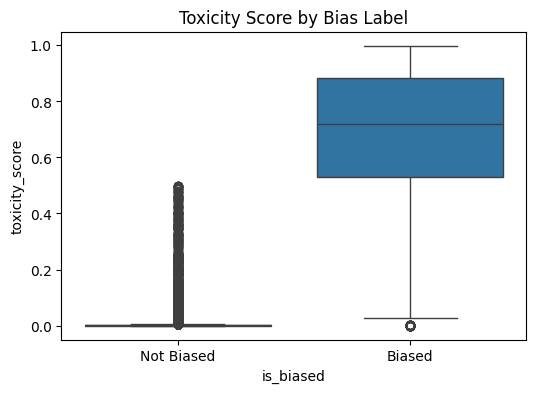

In [67]:
# 6. Toxicity vs. Bias
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='is_biased', y='toxicity_score')
plt.xticks([0,1], ["Not Biased","Biased"])
plt.title("Toxicity Score by Bias Label")
plt.show()

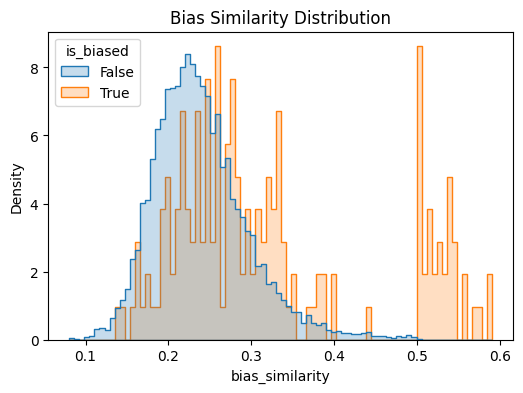

In [68]:
# 7. Bias similarity distribution
plt.figure(figsize=(6,4))
sns.histplot(df, x='bias_similarity', hue='is_biased', element='step', stat='density', common_norm=False)
plt.title("Bias Similarity Distribution")
plt.show()

<ipython-input-69-4fda0afa1947>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').agg(


Months present: ['January', 'September', 'October', 'November', 'December']
Missing months: ['February', 'March', 'April', 'May', 'June', 'July', 'August']


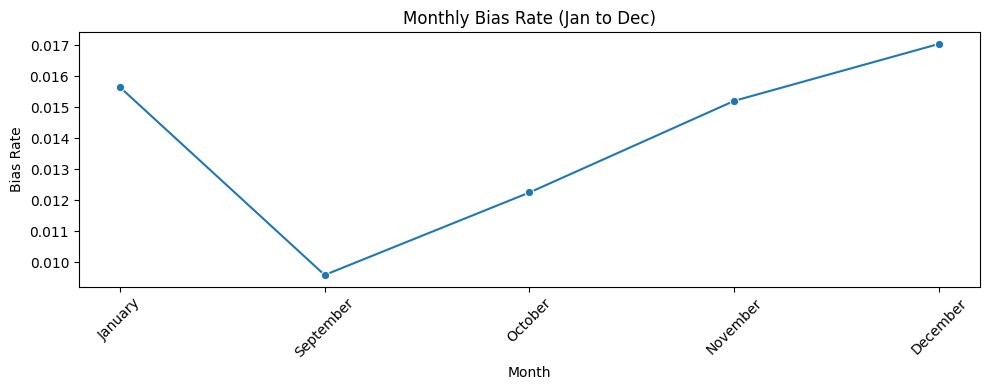

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# (Assuming df already loaded and 'date' is either a column or index)
# 1. Ensure 'date' is a datetime index
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
else:
    df.index = pd.to_datetime(df.index)

# 2. Compute monthly totals & biased counts
monthly = df.resample('M').agg(
    total_reviews=('is_biased', 'size'),
    biased_reviews=('is_biased', 'sum')
)
monthly['bias_rate'] = monthly['biased_reviews'] / monthly['total_reviews']

# 3. Check which months are present
months_present = sorted(monthly.index.month.unique())
print("Months present:", [calendar.month_name[m] for m in months_present])
missing = set(range(1,13)) - set(months_present)
if missing:
    print("Missing months:", [calendar.month_name[m] for m in sorted(missing)])
else:
    print("All 12 months are in your data.")

# 4. Prepare for Jan→Dec plotting
monthly = monthly.copy()
monthly['month'] = monthly.index.month
monthly['month_name'] = monthly.index.month_name()
monthly = monthly.sort_values('month')

# 5. Plot bias rate from Jan to Dec
plt.figure(figsize=(10,4))
sns.lineplot(
    data=monthly,
    x='month_name',
    y='bias_rate',
    marker='o'
)
plt.xlabel("Month")
plt.ylabel("Bias Rate")
plt.title("Monthly Bias Rate (Jan to Dec)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


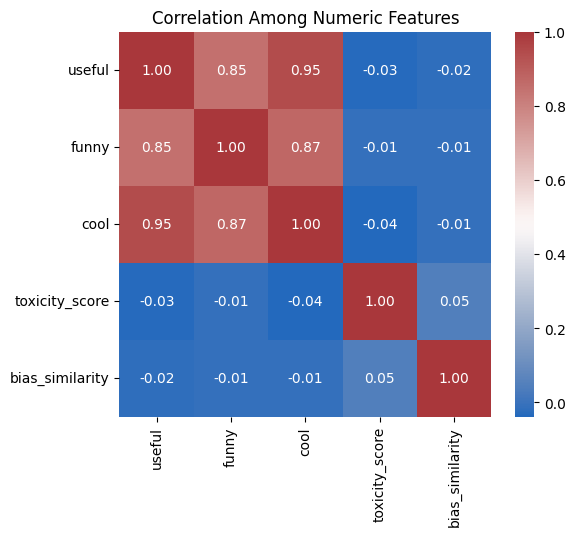

In [70]:
# 9. Correlation heatmap
numeric_cols = ['useful','funny','cool','toxicity_score','bias_similarity']
corr = df[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation Among Numeric Features")
plt.show()

In [1]:
import pandas as pd
from google.colab import files

# 1. Upload all 6 city files
print("🚀 Please upload all 6 city *_cleaned.csv files:")
uploaded = files.upload()

# 2. Read each into a DataFrame and collect
dfs = []
for filename in uploaded.keys():
    print(f"✔ Reading {filename}")
    df_city = pd.read_csv(filename)
    dfs.append(df_city)

# 3. Concatenate into one master DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
print(f"✔ Combined {len(dfs)} files into a single DataFrame with {combined_df.shape[0]} rows.")

# 4. Export the combined file
output_filename = "combined_cities.csv"
combined_df.to_csv(output_filename, index=False)
print(f"✔ Saved combined dataset as {output_filename}")


🚀 Please upload all 6 city *_cleaned.csv files:


Saving boise_labeled.csv to boise_labeled.csv
Saving edmonton_labeled.csv to edmonton_labeled.csv
Saving indianapolis_labeled.csv to indianapolis_labeled.csv
Saving new_orleans_labeled.csv to new_orleans_labeled.csv
Saving philadelphia_labeled.csv to philadelphia_labeled.csv
Saving tampa_labeled.csv to tampa_labeled.csv
✔ Reading boise_labeled.csv
✔ Reading edmonton_labeled.csv
✔ Reading indianapolis_labeled.csv
✔ Reading new_orleans_labeled.csv
✔ Reading philadelphia_labeled.csv
✔ Reading tampa_labeled.csv
✔ Combined 6 files into a single DataFrame with 72000 rows.
✔ Saved combined dataset as combined_cities.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded DataFrame with 72000 rows.
        chain  count
0  Restaurant  62552
1         Spa   5090
2       Hotel   2448
3       Other   1910


<ipython-input-2-3c480db1a966>:12: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=['date'], dayfirst=True)


<Figure size 600x400 with 0 Axes>

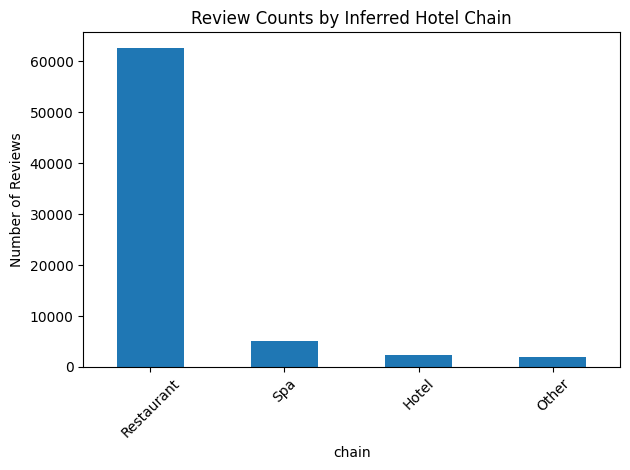

In [2]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Load the combined CSV from Drive
import pandas as pd

# Update this path to where your file actually resides in Drive
file_path = '/content/drive/MyDrive/combined_cities.csv'

# Parse dates with dayfirst format
df = pd.read_csv(file_path, parse_dates=['date'], dayfirst=True)
print(f"Loaded DataFrame with {len(df)} rows.")

# 3. Infer hotel chain by name matching
chains = ["Restaurant", "Spa", "Hotel"]

def detect_chain(categories):
    for c in chains:
        if c.lower() in categories.lower():
            return c
    return "Other"

df['chain'] = df['categories'].apply(detect_chain)

# 4. Count rows per chain
chain_counts = df['chain'].value_counts().rename_axis('chain').reset_index(name='count')
print(chain_counts)

# 5. (Optional) Display as a simple bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
chain_counts.plot.bar(x='chain', y='count', legend=False)
plt.ylabel("Number of Reviews")
plt.title("Review Counts by Inferred Hotel Chain")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# 1. Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# 2. Load the combined CSV (ISO dates → no dayfirst)
import pandas as pd
file_path = '/content/drive/MyDrive/combined_cities.csv'
df = pd.read_csv(file_path, parse_dates=['date'], dayfirst=False)
print(f"Loaded {len(df)} rows.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 72000 rows.


In [17]:
df.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,city,state,latitude,longitude,review_count,stars_y,clean_text,toxicity_score,bias_similarity,is_biased
0,nM7O8RC4zXOKniGc9aIH-g,dr2ojpUUx5thYYG7yPpGlQ,OqysWiDpJJbeZpmk5QOdgA,4,0,0,0,Enjoyed their sausage pear sandwich immensely....,2022-01-19 19:31:50,Lemon Tree,...,Boise,ID,43.618197,-116.204337,197,4.5,enjoyed their sausage pear sandwich immensely ...,0.001931,0.224289,False
1,-9PpVEtDts6uyuBPPGgeyw,9HGNO6R2Mx18v97oJCCyyQ,m_maf3G3NThyC1ron-kXOA,5,0,0,0,Coffee is alright but can't beat the bang for ...,2022-01-19 19:04:55,Zeppole Cafe,...,Boise,ID,43.581831,-116.174175,42,3.5,coffee is alright but can t beat the bang for ...,0.001116,0.159959,False
2,gvEI6fgvZdA6j82gjKCrNw,4xYfmnd0wMTYqnTp7EjCbw,tNPX0ck7Hj6RchtICfF-Kg,5,1,0,0,How have I never been here before?! The servic...,2022-01-19 03:05:54,Lucky Palace Chinese Restaurant,...,Boise,ID,43.590873,-116.290183,64,3.5,how have i never been here before the service ...,0.000912,0.203769,False
3,5C0iz8jGe31n91yrz_lXWw,_lxEn8XQmdPS8tVNFalaPg,YKhK6rCr7n0c2DaHkaZPDA,1,0,0,0,Place is open tell 9pm but according to the st...,2022-01-19 02:32:36,Chuck E. Cheese,...,Boise,ID,43.618654,-116.259163,18,3.5,place is open tell 9pm but according to the st...,0.000933,0.191839,False
4,j8Gu72oHuCWODFvreXVEMA,zYAf93zsIbXIEJet-5_0Qw,oGvauLs2oFbLIBUjv5F77Q,5,0,0,0,Saw the reviews on yelp and could agree more. ...,2022-01-19 01:37:11,Han's Chimaek,...,Boise,ID,43.591711,-116.193377,80,5.0,saw the reviews on yelp and could agree more t...,0.000778,0.299420,False


In [18]:
# Insert a new index column named 'row_number'
df.insert(0, 'row_number', range(1, len(df) + 1))

# Set 'row_number' as the index
df.set_index('row_number', inplace=True)

In [27]:
# 1. Show exactly what your columns are
print(df.columns.tolist())

['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny', 'cool', 'text', 'name', 'categories', 'city', 'state', 'latitude', 'longitude', 'review_count', 'stars_y', 'clean_text', 'toxicity_score', 'bias_similarity', 'is_biased', 'segment', 'chain', 'neighborhood_id']


In [21]:
# 3. Parse & index dates
df.set_index('date', inplace=True)

# 4. Normalize into high-level segments
def map_segment(cat):
    cats = [c.strip().lower() for c in cat.split(',')]
    if any('hotel' in c for c in cats):
        return 'Hotel'
    elif any('spa' in c for c in cats):
        return 'Spa'
    elif any('restaurant' in c for c in cats):
        return 'Restaurant'
    else:
        return 'Other'

df['segment'] = df['categories'].apply(map_segment)

# 5. Type conversions & downcasts
# Convert TRUE/FALSE to 0/1
# 3. Handle missing is_biased before casting
df['is_biased'] = df['is_biased'].fillna(False)
df['is_biased'] = df['is_biased'].map({True: 1, False: 0}).astype('int8')

# Downcast integer columns
for col in ['useful','funny','cool','stars_x','stars_y','review_count']:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Downcast float columns
for col in ['toxicity_score','bias_similarity']:
    df[col] = pd.to_numeric(df[col], downcast='float')

# Cast to categorical
for col in ['city','name','segment']:
    df[col] = df[col].astype('category')

# 6. Infer hotel chains by name matching
chains = ["Marriott", "Hilton", "Hyatt", "IHG"]
def detect_chain(name):
    for c in chains:
        if c.lower() in name.lower():
            return c
    return "Other"

df['chain'] = df['name'].apply(detect_chain).astype('category')

# 7. Generate neighborhood clusters with DBSCAN
from sklearn.cluster import DBSCAN
coords = df[['latitude','longitude']].to_numpy()
db = DBSCAN(eps=0.01, min_samples=5)
df['neighborhood_id'] = db.fit_predict(coords).astype('int16')

# 8. Export cleaned DataFrame for analysis
output_path = '/content/drive/MyDrive/processed_reviews.parquet'
df.to_parquet(output_path, index=True)
print(f"✔ Processed data saved to {output_path}")

✔ Processed data saved to /content/drive/MyDrive/processed_reviews.parquet


In [25]:
df.describe()

,stars_x,useful,funny,cool,latitude,longitude,review_count,stars_y,toxicity_score,bias_similarity,is_biased,neighborhood_id
count,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000
mean,3.844597,0.775917,0.204153,0.471625,39.141243,-93.933361,412.124042,3.915597,0.017505,0.240041,0.012208,121.777986
std,1.485702,2.412089,1.036978,2.029375,8.533596,15.491255,836.555874,0.678377,0.086421,0.057768,0.109816,82.810870
min,1.000000,0.000000,0.000000,0.000000,27.852310,-116.390242,5.000000,1.000000,0.000500,0.066108,0.000000,-1.000000
25%,3.000000,0.000000,0.000000,0.000000,29.954273,-113.499477,43.000000,3.500000,0.000754,0.201004,0.000000,29.000000
50%,5.000000,0.000000,0.000000,0.000000,39.924026,-88.124063,137.000000,4.000000,0.001087,0.232525,0.000000,166.000000
75%,5.000000,1.000000,0.000000,0.000000,43.614663,-82.483181,397.000000,4.500000,0.003072,0.269983,0.000000,197.000000
max,5.000000,134.000000,82.000000,112.000000,53.679197,-74.957990,7568.000000,5.000000,0.998703,0.664829,1.000000,249.000000
